# Machine learning modeling for predicting toxicity of chemical compunds
                     Artificial Intelligence for Biotechnology- 950497561 (S21)
 TUM Campus Straubing for Biotechnology and Sustainability, Weihenstephan-Treisdorf University of Applied Sciences

############################################################################################################

Importing matplotlib, pylab, numpy and KNeighborsClassifier 

In [1]:
%matplotlib inline 
import pylab as pl #pylab for plotting matplotlib oriented objects
import numpy as np #to easily manipulate the arrays that we are going to plot
from sklearn.neighbors import KNeighborsClassifier #importing classifier analysing the data by K-nearest neighboring method

# Importing X(data.csv)

In [2]:
X=np.array(np.loadtxt("data.csv",delimiter=",",dtype=np.str)) #for importing data.csv file into array


Converting the string of X(data.csv) into float

In [3]:
X=np.float_(X[1:,1:])#taking only the features without taking the sample & features names
samples_X=X #Extract sample name of the dataset

samples_X_strip=samples_X #sample_X_strip is to define the elements of samples_X remain after removing the missing values



Checking X (sample number, feature number and missing values) 

In [4]:
print("Number of samples of X: %d\t\t"%X.shape[0]) #sample number
print("Number of features of X:%d\t\t"%X.shape[1]) #feature number


missing_values=(np.isnan(X)).sum() #innan() function is to check the missing values
print("Missing Values: %d\t\t"%missing_values)
percentage_missing=(missing_values/X.size)*100 #determining the percentage by dividing with X.size
print("Percentage of Missing values:%d\t\t"%percentage_missing)

Number of samples of X: 12060		
Number of features of X:801		
Missing Values: 0		
Percentage of Missing values:0		


# Importing y(toxicity_labels.csv)

In [5]:
y=[]   #starting point of y variable 
samples_y=[]   #starting point of the variable that defines the sample names


f=open("toxicity_labels.csv","r") #importing the toxicity_labels.csv file into jupyter notebook and open it into reading mode



Converting y string data(toxicity_labels.csv) into float

In [6]:
for line in f:
    sv=line.strip().split(",")
    samples_y.append(str(sv[0]).replace("NA","NaN")) #replacing NA values into Not a Number(NaN) values in regard to represent the missing values in the data
    
    
    row=[]
    for element in sv:
        if element==0:
            continue
        row.append(str(element).replace("NA","NaN"))
    y.append(row)
    
f.close() #closes toxicity_labels.csv
y=np.array(y) #Converting y tuple into an array

y=np.float_(y[1:,1]) #extracting all samples with only our target NR.AhR label

samples_y=np.array(samples_y[1:])  ##assigning samples_y values into samples_y array




Removing missing data from X

In [11]:
X_strip=np.delete(X,sample_indices_to_remove,axis=0) # X_strip is defined the data of X remained after removing the missing data
samples_X_strip=np.delete(samples_X_strip,sample_indices_to_remove,axis=0)  # sample_X_strip is defined the data of samples_X remained after removing the missing data
print(X_strip.shape) #number samples and features of y after removing the missing values defined by X_strip

(8441, 801)


# Remaining data Normalization

**StandardScaler is used for data normalization which works by removing the mean(mean=0) and scaling each feature into unit variance (Standard deviation=1)

In [13]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_strip=scaler.fit_transform(X_strip) #fit is to calculating the mean and varience of each features and transform function returns the dataset produced by it
                                      #fit_transform is used together to improve the efficiency of the model

Generating figure to visualizing data normalization

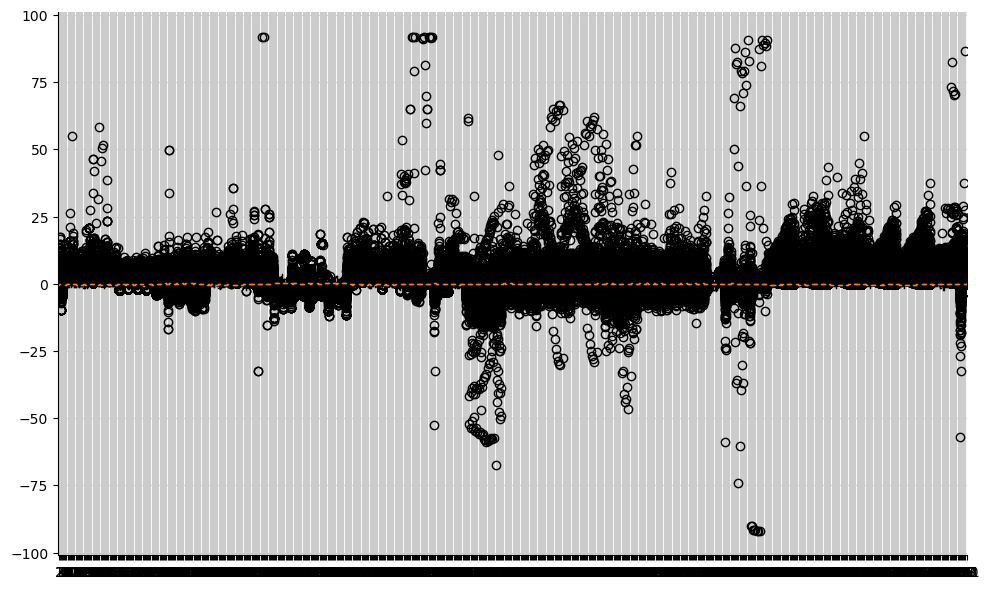

In [14]:
pl.figure(figsize=(10,6))
ax=pl.subplot(111)
ax.boxplot(X_strip)
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.tight_layout()

Checking the number of samples for both X_strip(X) and y_strip(y)

In [15]:
print("Number of samples of X_strip:\t%d"%X_strip.shape[0])
print("Number of samples of y:\t%d"% y.shape[0])

Number of samples of X_strip:	8441
Number of samples of y_strip:	8441


# Data Training and Testing

- spliting the X_strip and y_strip into train and test data by defining X_strip_test, X_strip_train, y_strip_test, y_strip_train

- here, we have maintained the test size =0.2, that means we have 20% validation data and 80% training data


In [16]:
from sklearn.model_selection import train_test_split #train_test_split is for splitting the data arrays into train dataset and test dataset 
X_strip_train,X_strip_test,y_train,y_test=train_test_split(X_strip,y,test_size=0.2)

# Dimention Reduction and Principal Component Analysis of the dataset

In [17]:
#computation of the covariance metrix(C) into standarized data
n=X_strip.shape[0] #samples of X_strip
C=1/(n-1)*np.dot(X_strip_train.T,X_strip_train)

#eigendecompose the matrix C into its eigenvalues and eigenvectors
import numpy.linalg as linalg #linalg function is used to compute eigenvalues and eigenvectors of the squared array
d,V=linalg.eig(C) #eigenvalues d and eigenvectors V


ind=np.argsort(d)[::-1] #sorting the eigenvalues in the decreasing order
# resorting the columns of the eigenvector matrix V using the indices from the sorting of the eigenvalues
d=d[ind]
V=V[:,ind]


i=0
vaMax=0.9 #maximum variance 0.9 (90%)
ratios_variance_explained=d/d.sum() #computing ratio variance by eigenvalues
va=ratios_variance_explained[0:i].sum()

while va<=vaMax:
    va=ratios_variance_explained[0:i].sum()
    print("First %.2f account for %.2f%% of the total variance"%(i,va*100))
    i+=1

First 0.00 account for 0.00% of the total variance
First 1.00 account for 32.44% of the total variance
First 2.00 account for 39.31% of the total variance
First 3.00 account for 45.39% of the total variance
First 4.00 account for 50.48% of the total variance
First 5.00 account for 54.79% of the total variance
First 6.00 account for 58.19% of the total variance
First 7.00 account for 60.74% of the total variance
First 8.00 account for 62.80% of the total variance
First 9.00 account for 64.38% of the total variance
First 10.00 account for 65.89% of the total variance
First 11.00 account for 67.29% of the total variance
First 12.00 account for 68.57% of the total variance
First 13.00 account for 69.78% of the total variance
First 14.00 account for 70.90% of the total variance
First 15.00 account for 71.97% of the total variance
First 16.00 account for 72.95% of the total variance
First 17.00 account for 73.82% of the total variance
First 18.00 account for 74.62% of the total variance
Firs

With the eigenvector of \begin{align} \textbf{V}_r  = 60\end{align},

The reduced X is computed by:

\begin{align}
\textbf{X}_r = \textbf{X_strip} \textbf{V}_r
\end{align}

Checking of how much variance the first 2 PCs account for 

In [16]:
ratios_variance_explained=d/d.sum()
va=ratios_variance_explained[0:59].sum()
print("First 2 PCs account for %.2f%% of the total variance"%(va*100))

First 2 PCs account for 89.91% of the total variance


Computing lower dimentional representation of out input data matrix

In [17]:
Xr=np.dot(X_strip,V[:,0:60]) 

Creating a bar chart to visualize the ratio variance explained for each Principal Component

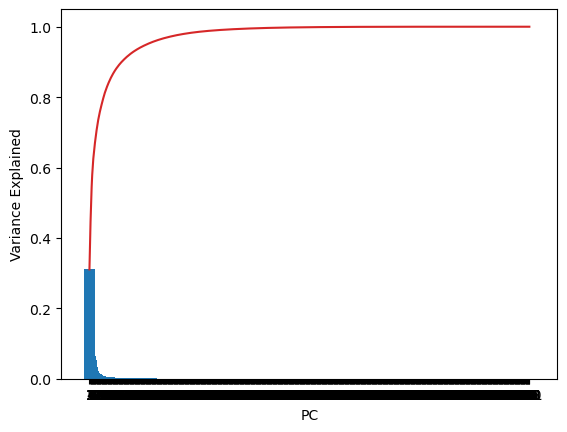

In [18]:
pl.plot(0,1)
xticks=np.arange(1,len(ratios_variance_explained)+1)
pl.bar(xticks,ratios_variance_explained,width=20)
pl.plot(xticks,np.cumsum(ratios_variance_explained),color="tab:red")
#pl.subplot(111)
#ax.grid(color="#CCCCCC")
pl.ylabel("Variance Explained")
pl.xlabel("PC")
pl.xticks(xticks)
pl.show()

# Best Model Evalution

# Support vector mechine using RBF-kernel
This was our best model with high values of Matthews Correlation Coefficient, Accuracy, Precision and Area Under the Curve (AUC)

### Some Important Point
**Radial Basis Function (RBF) Kernel

**StratifiedKFold is for cross validation by spliting data into train/test

**gridsearch is used for finding out optimal hyperparameters of a model which results in the most accurate prediction

**gridsearchCV through hyperperameter loop fit model on the training set


In [27]:
from sklearn.model_selection import StratifiedKFold  
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC #SVC is the support vector machine algorithm for the multiclass problem

params = {"C": np.logspace(-4,4,10),
          "gamma": np.logspace(-4,4,10)} #The dictionary has one key "C". C can take 10 different values in log-scale

#gamma is the parameter of RBF kernel which defines how far the single training data can reach

#10 fold cross validation by stratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
#n_splits=10 means 10 folds cross validation, shuffle is true means it will move to each of the fold,random_state ensure that the splits are reproducible


list_fpr_svm_rbf = [] #list for false positive result of svm rbf kernel
list_tpr_svm_rbf = [] #list for true postitive result of svm rbf kernel
auc_values_svm_rbf = [] #list for area under the curve of svm rbf kernel
precision_values = [] #list for precision values of svm rbf kernel
recall_values = [] #list for recall values of svm rbf kernel
accuracy_values = [] #list for accuracy values of svm rbf kernel
mcc_values = [] #list for mcc values of svm rbf kernel

####### cross validation by train and validation data by spliting X_strip (data after removing missing values of X) and y_strip(data after removing missing values of y)
for train_index, val_index in cv.split(X_strip,y):
    #Split data
    X_strip_train = X_strip[train_index]
    X_strip_val = X_strip[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    #Train Model by rbf kernel
    svc = SVC(kernel="rbf")
    
    gridsearch = GridSearchCV(svc,params, cv=2, scoring="accuracy") #cross validation iterators=2
    #the scoring is based on the scoring arguments, such as here "accuracy" metrics scorer 
    gridsearch.fit(X_strip_train,y_strip_train)
    
    #compute metrics for ROC Curve
    scores = gridsearch.decision_function(X_strip_val)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, scores, drop_intermediate=False)
    
    list_fpr_svm_rbf.append(fpr)
    list_tpr_svm_rbf.append(tpr)
    
    y_pred = gridsearch.predict(X_strip_val)
    auc_values_svm_rbf.append(metrics.roc_auc_score(y_val, y_pred))
    accuracy_values.append(metrics.accuracy_score(y_val, y_pred))
    recall_values.append(metrics.recall_score(y_val, y_pred))
    precision_values.append(metrics.precision_score(y_val, y_pred))
    mcc_values.append(metrics.matthews_corrcoef(y_val, y_pred))


#print results
print("SVM with a RBF")
print("ROC-AUC:\t%.2f (+-%.2f)" % (np.mean(auc_values_svm_rbf),np.std(auc_values_svm_rbf)))
print("Accuracy:\t%.2f (+-%.2f)" % (np.mean(accuracy_values),np.std(accuracy_values)))
print("Recall:\t\t%.2f (+-%.2f)" % (np.mean(recall_values),np.std(recall_values)))
print("Precision:\t%.2f (+-%.2f)" % (np.mean(precision_values),np.std(precision_values)))
print("MCC:\t\t%.2f (+-%.2f)" % (np.mean(mcc_values),np.std(mcc_values)))

SVM with a RBF
ROC-AUC:	0.92 (+-0.02)
Accuracy:	0.98 (+-0.01)
Recall:		0.84 (+-0.05)
Precision:	0.95 (+-0.02)
MCC:		0.88 (+-0.03)


Generate plot for SVM (RBF Kernel)

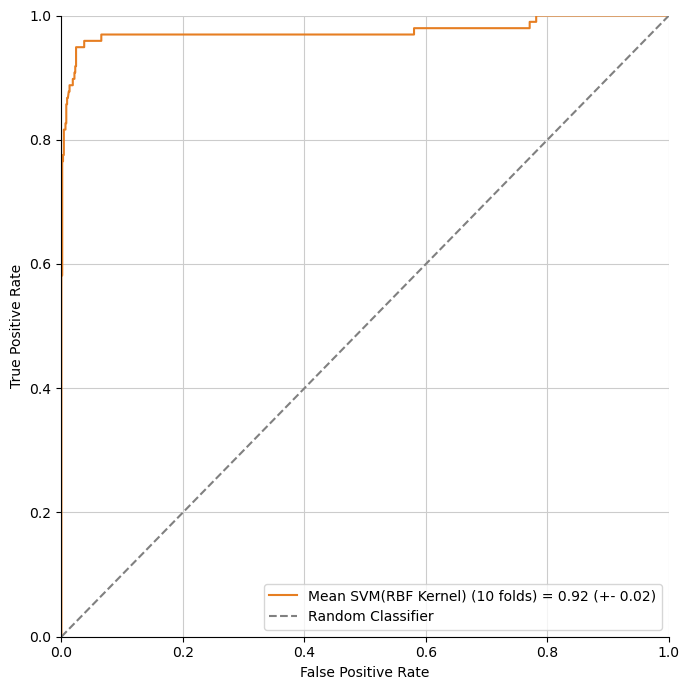

In [30]:
fig = pl.figure(figsize=(7,7))  #represent axis
ax = fig.add_subplot(111) #adding subplot

#plot roc curve for all 10 foldes
pl.plot(fpr, tpr, color="#e67e22",label="Mean SVM(RBF Kernel) (10 folds) = %.2f (+- %.2f)" % (np.mean(auc_values_svm_rbf),np.std(auc_values_svm_rbf)))
ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")


#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)

#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()

# Importing Unknown data and Prediction of Toxicity by SVM RBF Kernel

In [23]:
unknown = np.array(np.loadtxt("unknown_data.csv", delimiter=",", dtype = np.str)) #imporing unknown_data.csv into array
unknown_sample=unknown[1:,0] #sample elements of unknown data
unknown=np.float_(unknown[1:,1:]) #converting unknown string data (all column and row) into float data 


Checking Unknown data ( Sample number, feature number and missing values)

In [24]:
print("Number of samples of Unknown data:%d\t\t"%unknown.shape[0]) #unknown samples
print("Number of features of unknown data:%d\t\t"%unknown.shape[1]) #unknown features
missing_values=(np.isnan(unknown)).sum() #isnan() for checking missing values of unknown data
print("Missing values of unknown: %d \t\t"%missing_values)
percentage_missing=(missing_values/unknown.size)*100
print("Percentage of Missing values of unknown: %d\t\t"%percentage_missing)

Number of samples of Unknown data:610		
Number of features of unknown data:801		
Missing values of unknown: 0 		
Percentage of Missing values of unknown: 0		


 Normalizing Unknown data

In [25]:
unknown = scaler.fit_transform(unknown)  #fit is to calculating the mean and varience of each features and transform function returns the dataset produced by it
                                      #fit_transform is used together to improve the efficiency of the model
                                #scaler for data normalization

 Importing y label (Toxicity label) for Unknown data

In [ ]:
y_unknown = gridsearch.predict(unknown)

Generating CSV file

In [ ]:
i = 0
output = ""
for val in unknown_sample:
    output = output + str(unknown_sample[i]) + "," +str(int(y_unknown[i])) + "\n"
    i += 1

In [ ]:
import os
try: os.remove("Unkwon_RBF.csv")
except: pass
open("Unkwon_RBF_88 .csv", 'a').write(str(output)) 